In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
project_path = "/content/drive/MyDrive/ds_miloni_halkati"
os.chdir(project_path)
print("Working directory:", os.getcwd())

Working directory: /content/drive/MyDrive/ds_miloni_halkati


In [5]:
merged.columns.tolist()

['account',
 'coin',
 'execution_price',
 'size_tokens',
 'size_usd',
 'side',
 'timestamp_ist',
 'start_position',
 'direction',
 'closed_pnl',
 'transaction_hash',
 'order_id',
 'crossed',
 'fee',
 'trade_id',
 'timestamp',
 'timestamp_unix',
 'date_only',
 'value',
 'classification',
 'sentiment_simple']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

merged = pd.read_csv("csv_files/trader_with_sentiment.csv")

print("Merged shape:", merged.shape)
merged.head()


Merged shape: (211224, 21)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,order_id,crossed,fee,trade_id,timestamp,timestamp_unix,date_only,value,classification,sentiment_simple
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-02-12,70.0,Greed,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-02-12,70.0,Greed,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-02-12,70.0,Greed,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-02-12,70.0,Greed,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-02-12,70.0,Greed,Greed


In [7]:
merged[['sentiment_simple', 'classification', 'value']].head()


,sentiment_simple,classification,value
0,Greed,Greed,70.0
1,Greed,Greed,70.0
2,Greed,Greed,70.0
3,Greed,Greed,70.0
4,Greed,Greed,70.0


In [9]:
df = merged.copy()

grouped = df.groupby('sentiment_simple').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    total_pnl=('closed_pnl', 'sum'),
    total_volume_usd=('size_usd', 'sum'),
    avg_position_size=('start_position', 'mean'),
    trade_count=('closed_pnl', 'count')
).reset_index()

grouped

,sentiment_simple,avg_pnl,median_pnl,total_pnl,total_volume_usd,avg_position_size,trade_count
0,Fear,49.400738,0.0,4.352699e+06,4.057049e+08,9279.469588,88110
1,Greed,75.802441,0.0,3.548236e+06,1.741557e+08,22720.844785,46809
2,Neutral,45.015158,0.0,3.246943e+05,2.538111e+07,28643.021383,7213


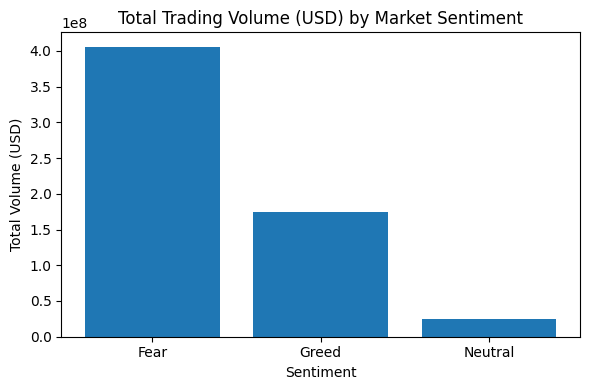

In [10]:
plt.figure(figsize=(6,4))
plt.bar(grouped['sentiment_simple'], grouped['total_volume_usd'])
plt.title("Total Trading Volume (USD) by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total Volume (USD)")
plt.tight_layout()
plt.savefig("outputs/volume_sentiment.png", dpi=300)
plt.show()

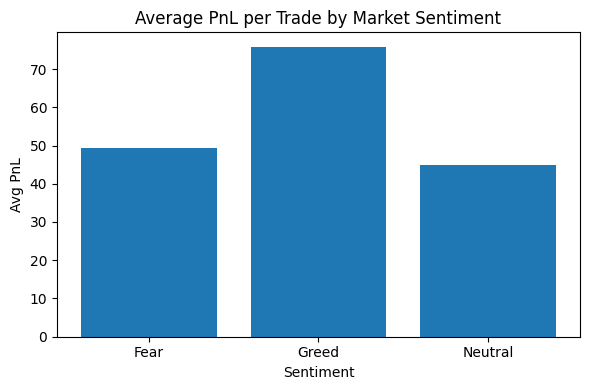

In [11]:
plt.figure(figsize=(6,4))
plt.bar(grouped['sentiment_simple'], grouped['avg_pnl'])
plt.title("Average PnL per Trade by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg PnL")
plt.tight_layout()
plt.savefig("outputs/avg_pnl_sentiment.png", dpi=300)
plt.show()


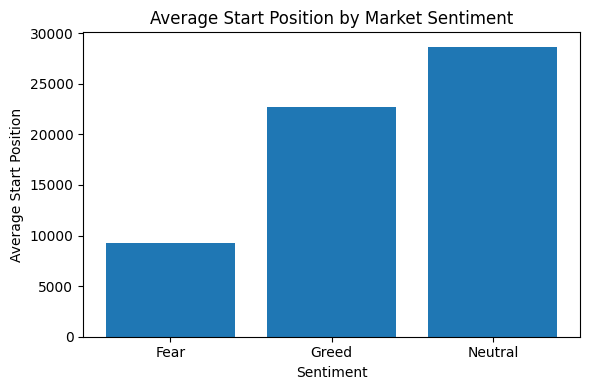

In [12]:
plt.figure(figsize=(6,4))
plt.bar(grouped['sentiment_simple'], grouped['avg_position_size'])
plt.title("Average Start Position by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Start Position")
plt.tight_layout()
plt.savefig("outputs/avg_position_sentiment.png", dpi=300)
plt.show()

In [13]:
longshort = merged.groupby(['sentiment_simple', 'side']).agg(
    avg_pnl=('closed_pnl', 'mean'),
    total_volume=('size_usd', 'sum'),
    trades=('closed_pnl', 'count')
).reset_index()

longshort

,sentiment_simple,side,avg_pnl,total_volume,trades
0,Fear,BUY,63.754873,2.063294e+08,43477
1,Fear,SELL,35.418378,1.993756e+08,44633
2,Greed,BUY,22.328856,8.170717e+07,20882
3,Greed,SELL,118.870880,9.244849e+07,25927
4,Neutral,BUY,21.251238,1.185181e+07,3090
5,Neutral,SELL,62.825129,1.352929e+07,4123
